In [38]:


import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [39]:
!ls

Clean_Tweets_subc.ipynb  c_t.ipynb	offenseval-training-v1.tsv
clean_tweet_subc.csv	 ML_Subc.ipynb


In [40]:
df = pd.read_csv("offenseval-training-v1.tsv", sep ='\t')

In [41]:
df.head()


,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [42]:
df.rename({'tweet':'text', 'subtask_a':'sentiment', 'subtask_b':'subb', 'subtask_c':'subc'}, axis=1,inplace=True)


In [43]:
df.head()

,id,text,sentiment,subb,subc
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [44]:
z = {'NOT' : 0 ,'OFF' : 1}
df['sentiment'] = df.sentiment.map(z)
z = {'UNT' : 0 ,'TIN' : 1}
df['subb'] = df.subb.map(z)

In [45]:
df.head()

,id,text,sentiment,subb,subc
0,86426,@USER She should ask a few native Americans wh...,1,0.0,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,1.0,IND
2,16820,Amazon is investigating Chinese employees who ...,0,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,0.0,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,NaN,NaN


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 5 columns):
id           13240 non-null int64
text         13240 non-null object
sentiment    13240 non-null int64
subb         4400 non-null float64
subc         3876 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 517.3+ KB


In [47]:


df.subc.value_counts()



IND    2407
GRP    1074
OTH     395
Name: subc, dtype: int64

In [48]:
df=pd.DataFrame(df[df.sentiment == 1])

In [49]:
df.head()

,id,text,sentiment,subb,subc
0,86426,@USER She should ask a few native Americans wh...,1,0.0,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,1.0,IND
3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,0.0,NaN
5,97670,@USER Liberals are all Kookoo !!!,1,1.0,OTH
6,77444,@USER @USER Oh noes! Tough shit.,1,0.0,NaN


In [50]:
df=pd.DataFrame(df[df.subb == 1])

In [51]:
df.head()

,id,text,sentiment,subb,subc
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,1.0,IND
5,97670,@USER Liberals are all Kookoo !!!,1,1.0,OTH
7,52415,@USER was literally just talking about this lo...,1,1.0,GRP
9,13384,@USER Canada doesn’t need another CUCK! We alr...,1,1.0,IND
12,28414,@USER you are a lying corrupt traitor!!! Nobod...,1,1.0,IND


In [52]:
df.drop(['sentiment','subb'],axis=1,inplace=True)

In [53]:
df.head()

,id,text,subc
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,IND
5,97670,@USER Liberals are all Kookoo !!!,OTH
7,52415,@USER was literally just talking about this lo...,GRP
9,13384,@USER Canada doesn’t need another CUCK! We alr...,IND
12,28414,@USER you are a lying corrupt traitor!!! Nobod...,IND


In [54]:
z = {'IND' : 0 ,'OTH' : 1,'GRP' : 2}
df['subc'] = df.subc.map(z)

In [55]:
df.head()

,id,text,subc
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,0
5,97670,@USER Liberals are all Kookoo !!!,1
7,52415,@USER was literally just talking about this lo...,2
9,13384,@USER Canada doesn’t need another CUCK! We alr...,0
12,28414,@USER you are a lying corrupt traitor!!! Nobod...,0


In [56]:


import re

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

#pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
part3 = r'#[A-Za-z0-9_]+'
combined_pat = r'|'.join((pat2,part3))
www_pat = r'www.[^ ]+'
url = r'URL'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    
    try:
        bom_removed = text.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = text
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    stripped = re.sub(url, '', stripped)
    
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()



In [57]:
testing = df.text

In [58]:
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))


In [59]:
len(df.text)

3876

In [60]:
len(test_result)

3876

In [61]:
df['text'] = test_result

In [62]:
df.head()

,id,text,subc
1,90194,user user go home you re drunk user,0
5,97670,user liberals are all kookoo,1
7,52415,user was literally just talking about this lol...,2
9,13384,user canada doesn need another cuck we already...,0
12,28414,user you are lying corrupt traitor nobody want...,0


In [67]:
df1 = df.sort_values(by='subc', ascending=False)

In [68]:
df1.head()

,id,text,subc
8088,46191,user user how does that make him the best in t...,2
11489,81896,user know whole lotta people spitting whole lo...,2
5623,25291,user see it damn shame how delusional he is he...,2
11546,38487,user is it gun control or anti haven seen sing...,2
11552,27483,user user user could be either liberals like t...,2


In [69]:


df1.to_csv('clean_tweet_subc_withuser_f.csv',encoding='utf-8',index = False)



In [20]:


df['pre_clean_len'] = [len(t) for t in df.text]



In [21]:
from pprint import pprint
data_dict = {
    'subc':{
        'type':df.subc.dtype,
        'description':'sentiment class - 0:untargeted, 1:targeted'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)


{'dataset_shape': (3876, 4),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'subc': {'description': 'sentiment class - 0:untargeted, 1:targeted',
          'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


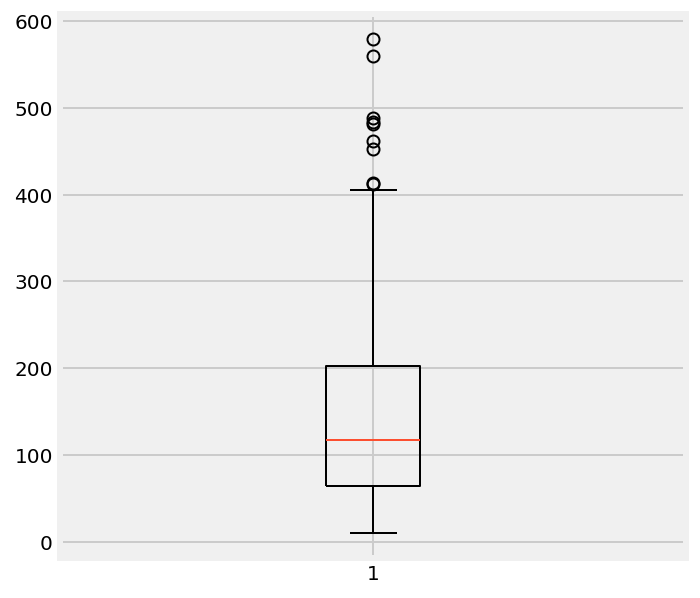

In [22]:


fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()



In [20]:
clean_df = pd.DataFrame()

clean_df['text'] = df.text
clean_df['target'] = df.subc
clean_df.head()



,text,target
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,0
5,@USER Liberals are all Kookoo !!!,1
7,@USER was literally just talking about this lo...,2
9,@USER Canada doesn’t need another CUCK! We alr...,0
12,@USER you are a lying corrupt traitor!!! Nobod...,0


In [65]:


clean_df.to_csv('clean_tweet_subc_withuser.csv',encoding='utf-8')



NameError: name 'clean_df' is not defined

In [22]:
clean_df.target.value_counts()

0    2407
2    1074
1     395
Name: target, dtype: int64